# Feature Engineering and Preparation for Titanic
In one of the previous exercises we have explored the titanic dataset. Now, we want to extract new features from the dataset and make it ready for classification algorithms.

As always, we start by importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline

# change default figure and font size for plots
matplotlib.rcParams['figure.figsize'] = (12.0, 9.0)
matplotlib.rcParams.update({'font.size': 12})

Please load the titanic data from the path **'../data/titanic_new.csv'** as a pandas dataframe called **titanic** and use the head and the info method on the dataframe.

In [3]:
# solution
titanic = pd.read_csv('../data/titanic_new.csv', sep=',')

In [4]:
# solution
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# solution
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Feature Engineering

Before we start dropping columns, filling null values and encoding categorical variables we want to construct some new features.

Please have a look at the **'name'** column. What kind of feature could we extract from that column?

In [6]:
# solution
# idx 796 (Dr.)
titanic['Name'].iloc[796]

'Leader, Dr. Alice (Farnham)'

### Extract Title
Maybe the title in front of the first name could be useful? Therefore, let's extract it by using a small python function and regex expression.

In [7]:
# just execute
import re
def getTitle(name):
    'Extracts the word on front of a dot (.)'
    title = re.search(r'(\w+\.)',name)
    return title.group(1)

Next, use the getTitle function in an apply method on the column 'Name' of the dataframe in order to get a new column containing all the titles. Name this new column 'Title'.

In [8]:
# solution
titanic['Title'] = titanic['Name'].apply(lambda name: getTitle(name))

Please extract all unique titles by using the unique() method on the column.

In [9]:
# solution
titanic['Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

Some of the titles seem to be very uncommon, e.g. *Jonkheer*. If you are interested in what this title means you can have a look at the wikipedia page (https://en.wikipedia.org/wiki/Jonkheer). There is only one person in the dataset having this title, who is that?

In [10]:
# solution
titanic[titanic['Title'] == 'Jonkheer.']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,Jonkheer.


Next, check the cardinality of the different titles by using the method value_counts or visualize them by using the seaborn method sns.countplot(data, column).

In [11]:
# solution
titanic['Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Mlle.          2
Ms.            1
Sir.           1
Jonkheer.      1
Lady.          1
Capt.          1
Mme.           1
Countess.      1
Don.           1
Name: Title, dtype: int64

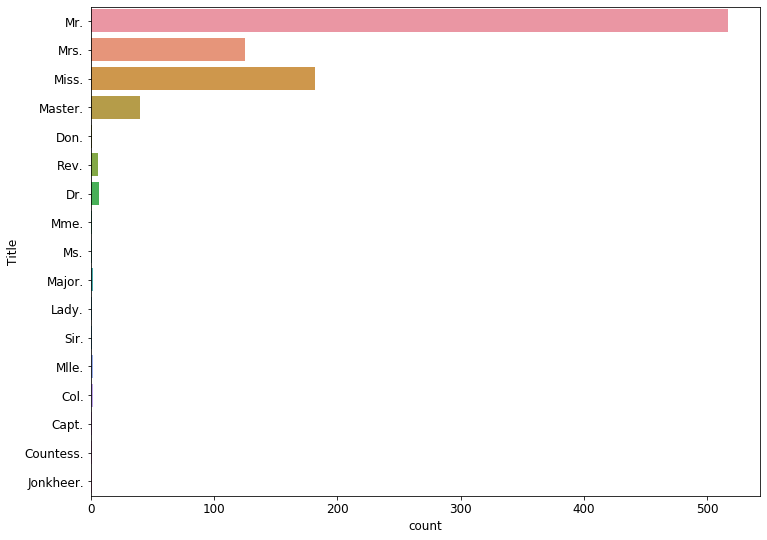

In [12]:
# solution
sns.countplot(data=titanic, y='Title')

Some tiltes are underrepresented. Hence, we combine all uncommon titles to a new feature called 'rareTitle'.
This can be easily done by using the map function and a python dictionary. In each Title field it replaces the key with the corresponding value. If the value in the column is not contained in the dictionary keys a null value will be inserted which we directly fill with tne value 'rareTitle'.

In [13]:
# just execute
map_dict = {
    'Ms.': 'Miss.',
    'Mlle.': 'Miss.',
    'Mr.' : 'Mr.',
    'Mrs.': 'Mrs.',
    'Miss.': 'Miss.'
}

titanic['Title'] = titanic['Title'].map(map_dict).fillna('rareTitle')

Again, check the unique titles and the cardinality.

In [14]:
# solution
titanic['Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'rareTitle'], dtype=object)

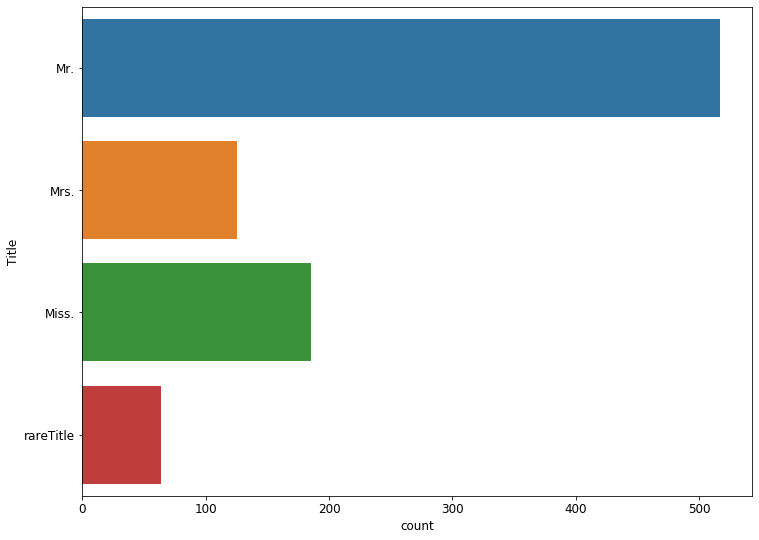

In [15]:
# solution
sns.countplot(data=titanic, y='Title')

Before we combine the common titles like Miss and Mrs we can extract another feature: married and unmarried female. Similar as before, we use a map function to generate this new feature.

Please add a new column called 'married' and apply a map function using the map_dict on the 'Title' column. Afterwards, fill the null values with the string 'unknown'.

In [16]:
# solution
map_dict = {
    'Miss.' : 'no',
    'Mrs.': 'yes',
}

titanic['marital_status'] = titanic['Title'].map(map_dict).fillna('Unknown')

In [17]:
titanic['marital_status'].unique()

array(['Unknown', 'yes', 'no'], dtype=object)

Finally, we combine the common titles in the 'Title' columns to the category 'noTitle'. Therefore, we use the numpy method np.where(). Check the docstring to see how it works.

In [18]:
# solution
# condition
cond = (titanic['Title'] == 'rareTitle')

# replace
titanic['Title'] = np.where(cond, 'rareTitle', 'noTitle')
titanic['Title'].unique()

array(['noTitle', 'rareTitle'], dtype=object)

Create a countplot of the two new features by using the method sns.countplot(x='column', data='data).

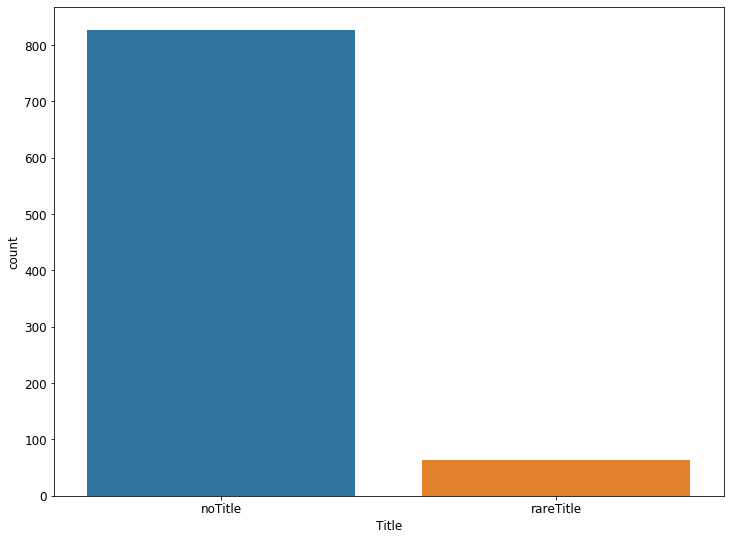

In [19]:
# solution
sns.countplot(data=titanic, x='Title')

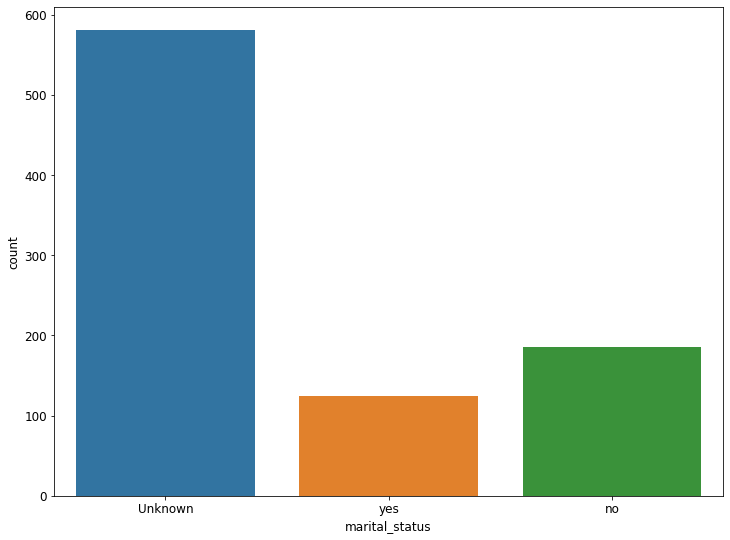

In [20]:
# solution
sns.countplot(data=titanic, x='marital_status')

# Deck
We can extract another feature from the 'Cabin' column which by itself is not doing much. A lot of null values are contained in that column since only 1st class passengers have cabins. A cabin number looks like 'C123', where the first letter refers to the deck. We extract the deck in a similar fashion as the title.

In [21]:
# cabin list
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'unknown']

In [22]:
# extract function
def charInString(charlist, text):
    for element in charlist:
        if element in text:
            return element
    return 'NaN'

In [23]:
# single check
charInString(cabin_list, 'C123')

'C'

In [24]:
# create feature column
titanic['Deck'] = titanic['Cabin'].fillna('unknown')\
    .apply(lambda x: charInString(cabin_list, x))

In [25]:
titanic['Deck'].unique()

array(['unknown', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId       891 non-null int64
Survived          891 non-null int64
Pclass            891 non-null int64
Name              891 non-null object
Sex               891 non-null object
Age               714 non-null float64
SibSp             891 non-null int64
Parch             891 non-null int64
Ticket            891 non-null object
Fare              891 non-null float64
Cabin             204 non-null object
Embarked          889 non-null object
Title             891 non-null object
marital_status    891 non-null object
Deck              891 non-null object
dtypes: float64(2), int64(5), object(8)
memory usage: 104.5+ KB


## Family Size
Finally, we add a new feature Family Size, which is just the sum of SibSp and Parch.

Please create this new column.

In [27]:
#solution
## Family size
titanic['Familiy_Size'] = titanic['SibSp'] + titanic['Parch']

In [28]:
# solution
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId       891 non-null int64
Survived          891 non-null int64
Pclass            891 non-null int64
Name              891 non-null object
Sex               891 non-null object
Age               714 non-null float64
SibSp             891 non-null int64
Parch             891 non-null int64
Ticket            891 non-null object
Fare              891 non-null float64
Cabin             204 non-null object
Embarked          889 non-null object
Title             891 non-null object
marital_status    891 non-null object
Deck              891 non-null object
Familiy_Size      891 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 111.5+ KB


## Feature Preparation

Finally, we can prepare our data so that we can feed it to a classification model in the next exercise. This part will be very similar to the feature preparation part of the house pricing dataset, i.e. splitting the data into a train and test dataset, filling null values and encoding the catogrical variables to numerical ones.

First, drop the unnecessary columns 'Cabin', 'PassengerId' and 'Ticket'.

In [29]:
# solution
# cropCols
cols = ['Cabin', 'PassengerId', 'Ticket', 'Name', 'SibSp', 'Parch',]

titanic.drop(cols, axis=1, errors='ignore', inplace=True)

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived          891 non-null int64
Pclass            891 non-null int64
Sex               891 non-null object
Age               714 non-null float64
Fare              891 non-null float64
Embarked          889 non-null object
Title             891 non-null object
marital_status    891 non-null object
Deck              891 non-null object
Familiy_Size      891 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


In [30]:
# what can happen if we dummy transform on test and train seperately?
titanic_dum = pd.get_dummies(titanic, prefix_sep='=', drop_first=True)
titanic_dum.head()

,Survived,Pclass,Age,Fare,Familiy_Size,Sex=male,Embarked=Q,Embarked=S,Title=rareTitle,marital_status=no,marital_status=yes,Deck=B,Deck=C,Deck=D,Deck=E,Deck=F,Deck=G,Deck=T,Deck=unknown
0,0,3,22.0,7.2500,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,1,38.0,71.2833,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,1,3,26.0,7.9250,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0
4,0,3,35.0,8.0500,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1


The only remaining column containing null values is the 'Age' column. Instead of just filling the values by the median or mean we design our own imputation method. Maybe you remember, that the medians differed across the passenger classes. Hence, we fill each null value with the mean of the class group. In sklearn it is straight forward to construct custom preprocessing function. Therefore, we build a custom class:

In [31]:
# just execute

# maybe transform to cat beforehand

from sklearn.base import TransformerMixin, BaseEstimator

class AgeImputer(TransformerMixin, BaseEstimator):
    '''Custom Imputator which computes the median of the age column grouped 
    by another feature and fills the null values accordingly'''
    
    def __init__(self, col, copy=True):
        self.col = col # col to groupyBy
        self.copy = copy # option
        self.median = {} # medianDict
        
    def fit(self, X, y=None):
        # fitting procedure fills the median dict
        self.median = X[['Age', self.col]].groupby(self.col)\
            .median().to_dict()['Age']
        return self
    
    def transform(self, X):
        X_ = X if not self.copy else X.copy()
        for key in self.median:
            # filling NaN values using conditional Expressions
            X_.loc[(  (X_['Age'].isnull()) &
                    (X_['Pclass'] == key)),'Age'] = self.median[key]
        return X_

The class above contains a fit method. As we already know we are only allowed to use fit functions on the training set. Hence, we have to split our data into test and training datasets.

In [32]:
from sklearn.model_selection import train_test_split
#from sklearn.externals import joblib
#from sklearn.preprocessing import Imputer
# fix random seed
np.random.seed(42)

In [33]:
#split dataframe in training and test dfs
titanic_train, titanic_test = train_test_split(titanic_dum, test_size=0.2,
                                               random_state=42)

In [34]:
# solution
ageImputer = AgeImputer(col='Pclass')

In [35]:
ageImputer.get_params()

{'col': 'Pclass', 'copy': True}

In [36]:
#ageImputer.median
ageImputer.fit(titanic_train)

AgeImputer(col='Pclass', copy=True)

In [37]:
ageImputer.median

{1: 37.0, 2: 29.0, 3: 25.0}

In [38]:
# solution
train_df = ageImputer.fit_transform(titanic_train)
test_df = ageImputer.transform(titanic_test)
test_df.head()

,Survived,Pclass,Age,Fare,Familiy_Size,Sex=male,Embarked=Q,Embarked=S,Title=rareTitle,marital_status=no,marital_status=yes,Deck=B,Deck=C,Deck=D,Deck=E,Deck=F,Deck=G,Deck=T,Deck=unknown
709,1,3,25.0,15.2458,2,1,0,0,1,0,0,0,0,0,0,0,0,0,1
439,0,2,31.0,10.5000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
840,0,3,20.0,7.9250,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
720,1,2,6.0,33.0000,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1
39,1,3,14.0,11.2417,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [41]:
# solution
# save the two dataframes
train_df.to_pickle('../data/titanic_train.pkl')
test_df.to_pickle('../data/titanic_test.pkl')

train_df.to_csv('../data/titanic_train.csv')
test_df.to_csv('../data/titanic_test.csv')

In [40]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 709 to 10
Data columns (total 19 columns):
Survived              179 non-null int64
Pclass                179 non-null int64
Age                   179 non-null float64
Fare                  179 non-null float64
Familiy_Size          179 non-null int64
Sex=male              179 non-null uint8
Embarked=Q            179 non-null uint8
Embarked=S            179 non-null uint8
Title=rareTitle       179 non-null uint8
marital_status=no     179 non-null uint8
marital_status=yes    179 non-null uint8
Deck=B                179 non-null uint8
Deck=C                179 non-null uint8
Deck=D                179 non-null uint8
Deck=E                179 non-null uint8
Deck=F                179 non-null uint8
Deck=G                179 non-null uint8
Deck=T                179 non-null uint8
Deck=unknown          179 non-null uint8
dtypes: float64(2), int64(3), uint8(14)
memory usage: 10.8 KB
